# Twitter US Airline Sentiment Analysis
## Project Overview
- Social media platforms like Twitter have become an integral part of modern communication, providing a platform for users to share opinions, experiences, and feedback in real-time. For businesses, especially in the airline industry, monitoring and understanding customer sentiment on social media are crucial for maintaining brand reputation and improving customer satisfaction. The Twitter US Airline Sentiment dataset offers a rich source of data for analyzing customer sentiments towards various US airlines.

## Problem Statement
- The objective of the project is to conduct sentiment analysis on the Twitter US Airline Sentiment dataset to gain insights into customer perceptions of different US airlines. By analyzing the sentiments expressed in tweets, we seek to understand the overall sentiment landscape, identify factors influencing sentiment, and provide actionable insights for airlines to improve customer satisfaction and brand reputation.
- Additionally, this project involves the development of a machine learning model to predict the sentiment of tweets towards airlines. By building an effective sentiment analysis model, we aim to automate the process of analyzing customer sentiments, enabling airlines to efficiently monitor and respond to customer feedback on social media platforms.

## Importing Necessary Libraries

In [1]:
# for dataframe manipulation and analysis
import pandas as pd
import numpy as np

# for data visualiztion
import matplotlib.pyplot as plt
import seaborn as sns

# for warning filtering
import warnings
warnings.filterwarnings('ignore')

# for data preprocessing
import re
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.model_selection import train_test_split

# for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading Dataset

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


### About the dataset
- The dataset used in this project is the Twitter US Airline Sentiment dataset, obtained from kaggle. It consists of tweets posted by users about various US airlines, along with sentiment labels (positive, negative, neutral), airline information, and timestamps.

## Exploratory Data Analysis

In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  float64
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

#### observation
- There are 14604 records and 15 features in the dataset.
- There are some missing values in some of the features.

### Sentiment distribution

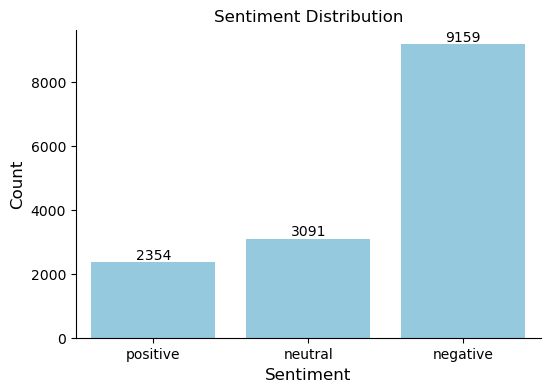

In [5]:
plt.figure(figsize = (6,4))
y = sns.countplot(df['airline_sentiment'],order = ['positive','neutral','negative'],color = 'skyblue')
y.bar_label(y.containers[0])
sns.despine()
plt.xlabel('Sentiment',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.title('Sentiment Distribution',fontsize = 12)
plt.show()

#### observation
- There are three sentiment positive, negative & neutral.
- The sentiment distribution plot shows that the majority of tweets are negative, followed by neutral and positive sentiments. 
- This indicates that there might be more negative sentiments expressed towards US airlines on Twitter compared to positive ones.

### Sentiment Distribution by Airline

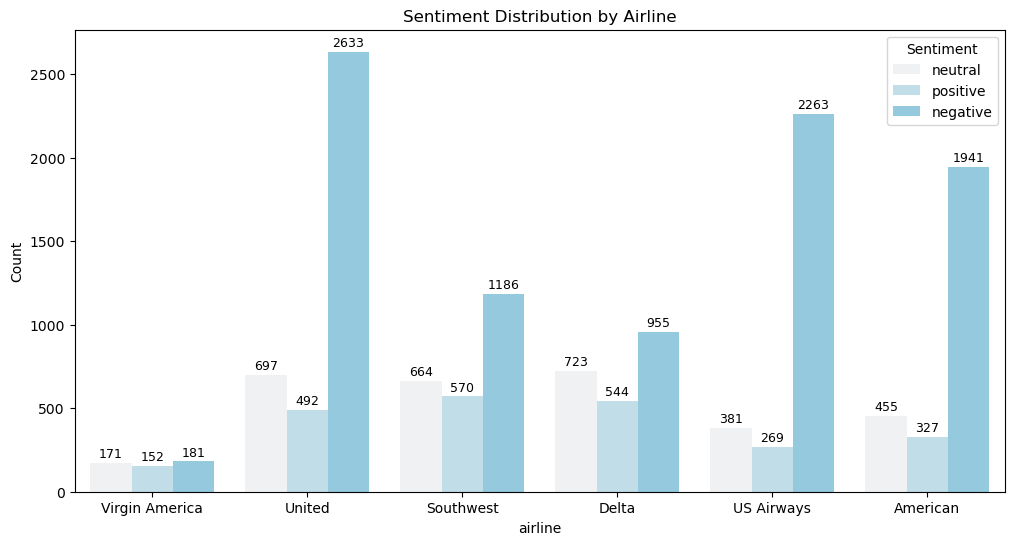

In [6]:
plt.figure(figsize = (12,6))
ax = sns.countplot(data = df,x = 'airline',hue = 'airline_sentiment',color = 'skyblue')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width() / 2,p.get_height()),ha = 'center',xytext = (0,4),
                textcoords = 'offset points',size = 9)
plt.title('Sentiment Distribution by Airline')
plt.xlabel('airline')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

#### Observation
There are six different airlines like United, US Airways, American, Southwest, Delta and Virgin America.
- United, US Airways, American
 - This airlines have more negative sentiment, with a significantly higher count of negative tweets compared to positive and neutral ones.
 - The high proportion of negative sentiment suggests that customers may be experiencing issues or dissatisfaction with the services provided by these Airlines.
- Delta airlines
 - This airline shows a more balanced sentiment distribution, with comparable counts of positive, negative, and neutral tweets.
 - This suggests that while there may be areas for improvement, this airline also has satisfied customers that contribute to positive sentiment.

### Negative Reason Distribution

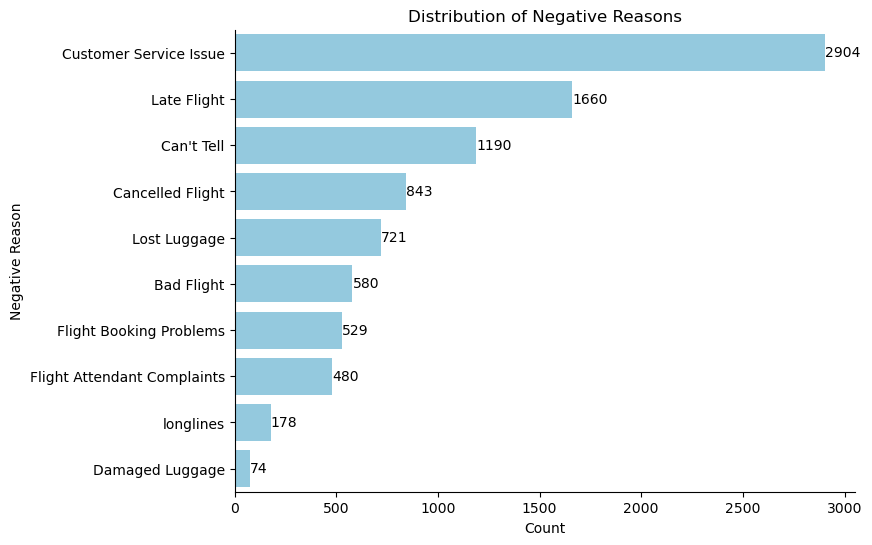

In [7]:
plt.figure(figsize=(8, 6))
y = sns.countplot(data=df, y='negativereason',order = df['negativereason'].value_counts().index,color = 'skyblue')
y.bar_label(y.containers[0])
sns.despine()
plt.title('Distribution of Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

#### Observation
- Common negative reasons expressed in tweets include poor customer service,flight delays or Cancellations,issues with booking or reservations and Baggage Handling Issues.
- By addressing these negative reasons and implementing strategies to improve service quality, communication, and customer experience, airlines can enhance overall customer satisfaction, loyalty, and brand reputation.

##  Sentiment Analysis Model

- By looking into the data, airline_sentiment and text are important columns for developing a model that predict the sentiment of tweets towards airlines.

In [8]:
df = df[['text','airline_sentiment']]

### Data preprocessing

In [9]:
def data_cleaning(text):
    text = text.lower()
    text = re.sub('http\s+',' ',text)
    text = re.sub('[^a-z]',' ',text)
    words = text.split()
    imp_words = [x for x in words if x not in stop]
    return ' '.join(imp_words)

In [10]:
df['clean_text'] = df['text'].apply(lambda x:data_cleaning(x))

In [11]:
le = LabelEncoder()
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

## Creating Training,validation and Test set

In [12]:
X = df['clean_text']
y = df['airline_sentiment']

In [13]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size = 0.1,random_state = 5,shuffle = True)

In [14]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size = 0.1)

## Feature Extraction

In [15]:
tf_idf = TfidfVectorizer()
X_train_all = tf_idf.fit_transform(X_train)
X_valid_all = tf_idf.transform(X_valid)
X_test_all = tf_idf.transform(X_test)

## Model Selection

### Training on Different Models

In [16]:
# ml models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score

# cross validation
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [17]:
def model_builder(estimators):
    for estimator in estimators:
        estimator.fit(X_train_all,y_train)
        
        # model evaluation
        training_accuracy = estimator.score(X_train_all,y_train)
        y_pred = estimator.predict(X_valid_all)
        validation_accuracy = accuracy_score(y_valid,y_pred)
        conf_matrix = confusion_matrix(y_valid,y_pred)
        f1score = f1_score(y_valid,y_pred,average = 'weighted')
        
        print('MODEL NAME:',type(estimator).__name__)
        print('\nTraining Accuracy:',round(training_accuracy,4),end = '\t')
        print('Validation Accuracy:',round(validation_accuracy,4),end = '\t')
        print('f1 score:',round(f1score,4))
        print('confusion matrix:\n',conf_matrix)
        print('\n')

In [18]:
model_builder([LogisticRegression(),MultinomialNB(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),
              XGBClassifier()])

MODEL NAME: LogisticRegression

Training Accuracy: 0.8734	Validation Accuracy: 0.7939	f1 score: 0.7835
confusion matrix:
 [[775  44  10]
 [110 138  22]
 [ 55  30 131]]


MODEL NAME: MultinomialNB

Training Accuracy: 0.7345	Validation Accuracy: 0.6867	f1 score: 0.6101
confusion matrix:
 [[822   6   1]
 [222  41   7]
 [160  16  40]]


MODEL NAME: SVC

Training Accuracy: 0.9565	Validation Accuracy: 0.7833	f1 score: 0.7655
confusion matrix:
 [[789  28  12]
 [135 114  21]
 [ 65  24 127]]


MODEL NAME: RandomForestClassifier

Training Accuracy: 0.9958	Validation Accuracy: 0.7559	f1 score: 0.7377
confusion matrix:
 [[772  39  18]
 [131 118  21]
 [ 84  28 104]]


MODEL NAME: GradientBoostingClassifier

Training Accuracy: 0.7564	Validation Accuracy: 0.7475	f1 score: 0.7131
confusion matrix:
 [[794  17  18]
 [182  69  19]
 [ 78  18 120]]


MODEL NAME: XGBClassifier

Training Accuracy: 0.8577	Validation Accuracy: 0.7703	f1 score: 0.758
confusion matrix:
 [[760  51  18]
 [125 117  28]
 [ 52  28 13

### Training a neural network

In [19]:
tf_idf = TfidfVectorizer()
X_train_nn = tf_idf.fit_transform(X_train).toarray()
X_valid_nn = tf_idf.transform(X_valid).toarray()
X_test_nn = tf_idf.transform(X_test).toarray()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow import keras
from keras.regularizers import l1, l2

In [21]:
model = Sequential([
    Dense(15,activation = 'relu',input_shape = (X_train_nn.shape[1],)),
    Dropout(0.5),
    Dense(3,activation = 'softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180090    
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 48        
                                                                 
Total params: 180,138
Trainable params: 180,138
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer = 'adam',loss = 'SparseCategoricalCrossentropy',metrics = ['accuracy'])

In [24]:
history = model.fit(X_train_nn,y_train,epochs = 30,batch_size = 500,validation_data = (X_valid_nn,y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5,restore_best_weights = True)])

Epoch 1/30
24/24 [==============================] - 3s 62ms/step - loss: 1.0746 - accuracy: 0.5726 - val_loss: 1.0423 - val_accuracy: 0.6304
Epoch 2/30
24/24 [==============================] - 1s 49ms/step - loss: 1.0145 - accuracy: 0.6257 - val_loss: 0.9779 - val_accuracy: 0.6304
Epoch 3/30
24/24 [==============================] - 1s 52ms/step - loss: 0.9505 - accuracy: 0.6308 - val_loss: 0.9110 - val_accuracy: 0.6380
Epoch 4/30
24/24 [==============================] - 1s 39ms/step - loss: 0.8851 - accuracy: 0.6485 - val_loss: 0.8480 - val_accuracy: 0.6517
Epoch 5/30
24/24 [==============================] - 1s 41ms/step - loss: 0.8279 - accuracy: 0.6671 - val_loss: 0.7942 - val_accuracy: 0.6684
Epoch 6/30
24/24 [==============================] - 1s 49ms/step - loss: 0.7742 - accuracy: 0.6899 - val_loss: 0.7487 - val_accuracy: 0.6852
Epoch 7/30
24/24 [==============================] - 1s 42ms/step - loss: 0.7275 - accuracy: 0.7215 - val_loss: 0.7102 - val_accuracy: 0.7087
Epoch 8/30
24

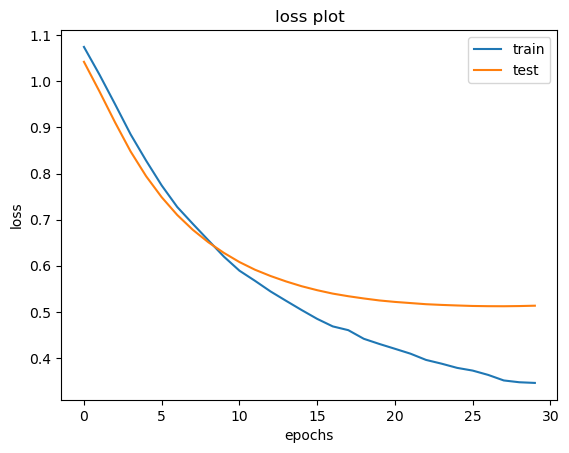

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(('train','test'))
plt.show()

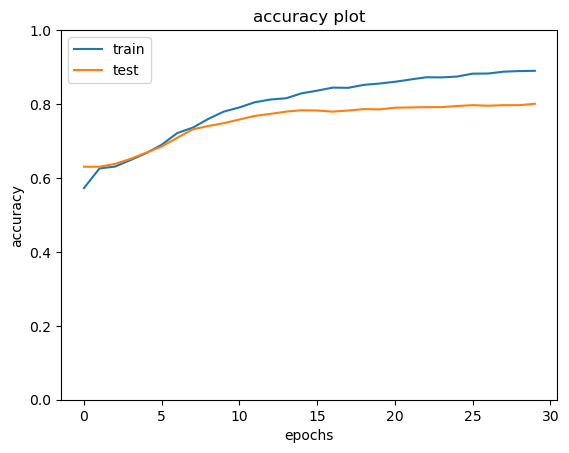

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(('train','test'))
plt.ylim(0,1)
plt.show()

- lets select Neural network as it is giving more accuracy on validation data.

In [27]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

## Testing on Test Data

In [28]:
model = joblib.load('model.pkl')

In [29]:
model.evaluate(X_test_nn,y_test)

46/46 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.8097


[0.4900151193141937, 0.8097193837165833]

## Conclusion
In this project, we conducted sentiment analysis on the Twitter US Airline Sentiment dataset to gain insights into customer perceptions of different US airlines. Our analysis aimed to understand the overall sentiment landscape, identify factors influencing sentiment, and provide actionable insights for airlines to improve customer satisfaction and brand reputation.

#### Overall Sentiment Landscape:
- The analysis revealed that among the major US airlines, sentiments expressed on Twitter varied significantly. Southwest airlines received the highest proportion of positive sentiments, followed by delta Airlines and United Airlines. Virgin America Airlines had a more balanced distribution of positive, negative, and neutral sentiments, while sentiment towards United,Us airways and American Airlines was predominantly negative.

#### Factors Influencing Sentiment:
- Negative sentiments were often associated with factors such as flight delays, poor customer service experiences, and issues with baggage handling. Specifically, tweets mentioning flight delays and cancellations,poor customer service were among the most common negative sentiments across all airlines.

#### Insights for Airlines:
- The analysis provides actionable insights for airlines to enhance customer satisfaction and brand reputation. Airlines should prioritize addressing common points mentioned in negative tweets, such as improving operational efficiency to minimize flight disruptions and enhancing the responsiveness and effectiveness of customer service interactions.

#### Machine Learning Model Evaluation:
- The machine learning model developed for sentiment prediction demonstrated promising performance, achieving an accuracy of 80% on the test dataset. Among the models evaluated, the Neural network model outperformed others in terms of both accuracy.